In [282]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, RepeatedKFold, cross_val_score
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import metrics, svm
from sklearn.feature_selection import SelectKBest, f_regression

In [283]:
# Run the data preprocessing notebook
data = pd.read_csv('docs/Breast_Cancer_Dataset.csv')

In [284]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data Preparation

In [285]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [286]:
data.shape

(569, 33)

In [287]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [288]:
# Drop ID Column
data = data.drop(['id','Unnamed: 32'], axis=1)

In [289]:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
data['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [290]:
# Check if Duplicated
data.duplicated().value_counts()

False    569
Name: count, dtype: int64

In [291]:
# There are not Na's in the data
for column in data:
    print(data[column].isna().value_counts())
    print(" ")

diagnosis
False    569
Name: count, dtype: int64
 
radius_mean
False    569
Name: count, dtype: int64
 
texture_mean
False    569
Name: count, dtype: int64
 
perimeter_mean
False    569
Name: count, dtype: int64
 
area_mean
False    569
Name: count, dtype: int64
 
smoothness_mean
False    569
Name: count, dtype: int64
 
compactness_mean
False    569
Name: count, dtype: int64
 
concavity_mean
False    569
Name: count, dtype: int64
 
concave points_mean
False    569
Name: count, dtype: int64
 
symmetry_mean
False    569
Name: count, dtype: int64
 
fractal_dimension_mean
False    569
Name: count, dtype: int64
 
radius_se
False    569
Name: count, dtype: int64
 
texture_se
False    569
Name: count, dtype: int64
 
perimeter_se
False    569
Name: count, dtype: int64
 
area_se
False    569
Name: count, dtype: int64
 
smoothness_se
False    569
Name: count, dtype: int64
 
compactness_se
False    569
Name: count, dtype: int64
 
concavity_se
False    569
Name: count, dtype: int64
 
concave point

##### outliers

In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def handle_outliers_and_normalize(data, numerical_cols, target_col, strategy="keep"):
    """
    Detects outliers, plots the distribution of each numerical column, handles outliers based on the chosen strategy,
    and normalizes numerical variables while leaving the target column unchanged.

    Parameters:
    - data (pd.DataFrame): Input dataset.
    - numerical_cols (list): List of numerical columns to analyze.
    - target_col (str): Name of the target column that should NOT be modified.
    - strategy (str): Strategy to handle outliers.
        - "remove": Removes rows with outliers.
        - "median": Replaces outliers with the median of the column.
        - "mean": Replaces outliers with the mean of the column.
        - "keep": Leaves outliers as they are.

    Returns:
    - pd.DataFrame: Modified and normalized dataset with handled outliers.
    """
    # Create a copy of the original data to avoid modifying it
    data_copy = data.copy()
    outliers_info = {}

    for col in numerical_cols:
        # Calculate IQR (Interquartile Range)
        Q1 = data[col].quantile(0.25)  # 25th percentile
        Q3 = data[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1

        # Define lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Detect outliers
        outliers = data_copy[(data_copy[col] < lower_bound) | (data_copy[col] > upper_bound)]
        num_outliers = len(outliers)
        outliers_info[col] = num_outliers

        # Plot boxplot and histogram for each column
        plt.figure(figsize=(10, 4))

        # Boxplot
        plt.subplot(1, 2, 1)
        plt.boxplot(data[col], vert=False)
        plt.title(f'Boxplot of {col}')

        # Histogram
        plt.subplot(1, 2, 2)
        plt.hist(data[col], bins=30, color='skyblue', edgecolor='black')
        plt.title(f'Distribution of {col}')

        plt.show()

        # Handle outliers based on the chosen strategy
        if strategy == "remove":
            # Remove rows with outliers
            data_copy = data_copy[(data_copy[col] >= lower_bound) & (data_copy[col] <= upper_bound)]

        elif strategy == "median":
            # Replace outliers with the median
            median_value = data[col].median()
            data_copy.loc[data_copy[col] < lower_bound, col] = median_value
            data_copy.loc[data_copy[col] > upper_bound, col] = median_value

        elif strategy == "mean":
            # Replace outliers with the mean
            mean_value = data[col].mean()
            data_copy.loc[data_copy[col] < lower_bound, col] = mean_value
            data_copy.loc[data_copy[col] > upper_bound, col] = mean_value

        elif strategy == "keep":
            # Do nothing, keep the outliers
            pass

    # Drop any NaN rows caused by inconsistent index alignment
    if strategy == "remove":
        data_copy = data_copy.dropna().reset_index(drop=True)

    print("\nSummary of detected outliers per column:")
    for col, count in outliers_info.items():
        print(f"- {col}: {count} outliers detected")

    # Separate features and target to prevent normalizing the target column
    features = data_copy[numerical_cols]
    target = data_copy[target_col].reset_index(drop=True)

    # Normalize numerical variables (excluding target column)
    scaler = StandardScaler().set_output(transform="pandas")
    normalized_features = scaler.fit_transform(features)

    # Combine normalized features with the target column
    normalized_data = pd.concat([normalized_features, target], axis=1)

    print("\nNumerical variables successfully normalized while keeping the target column unchanged.")
    
    return normalized_data

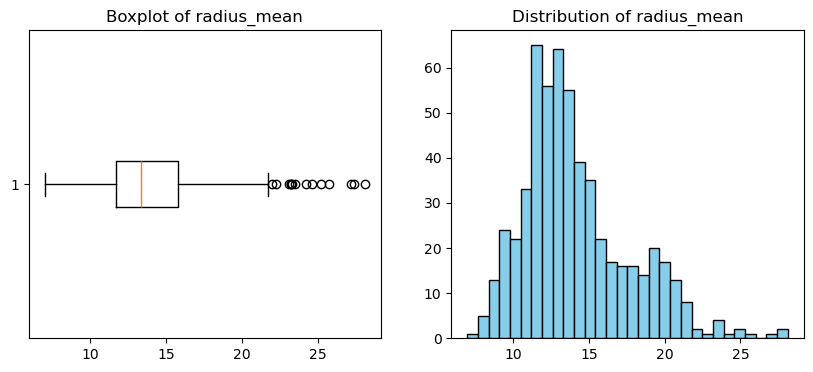

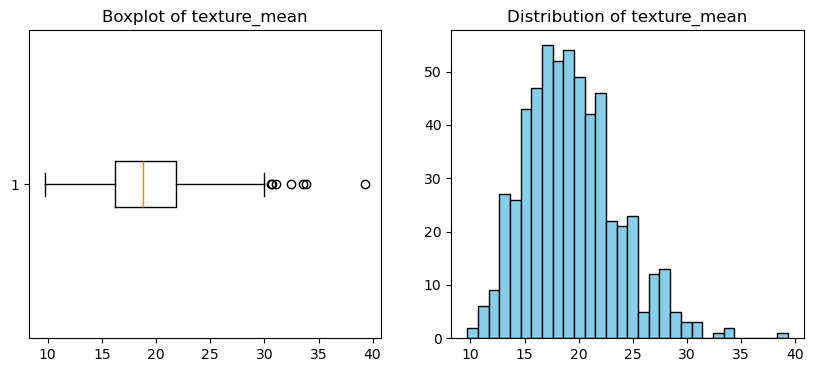

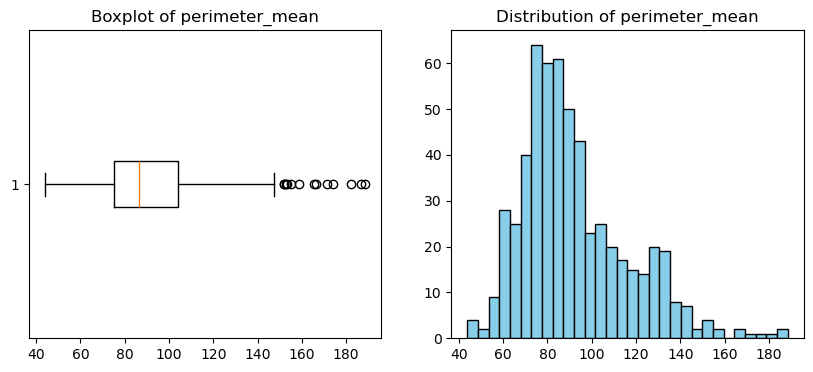

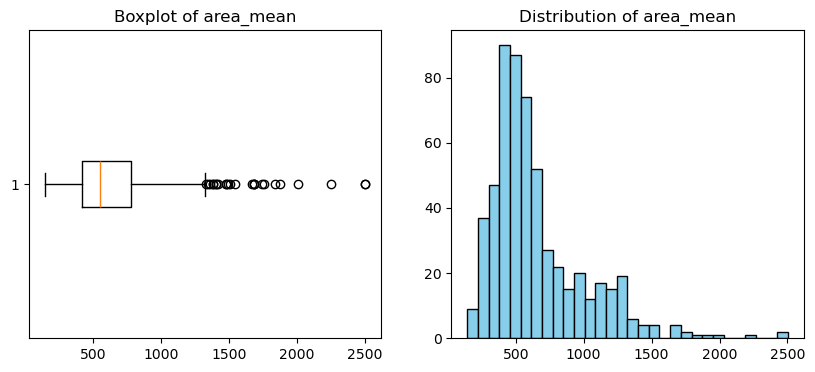

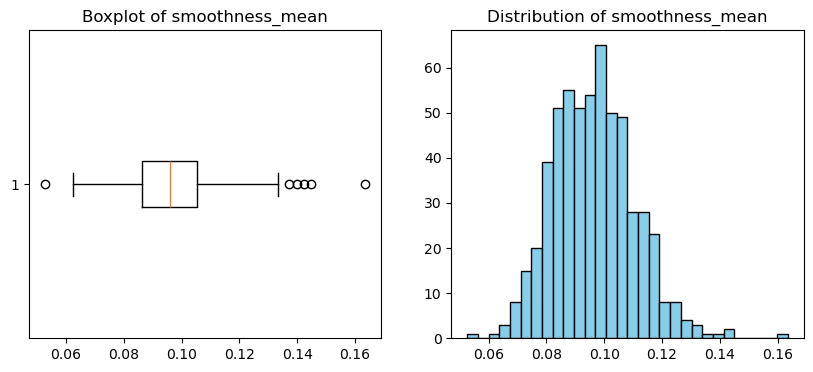

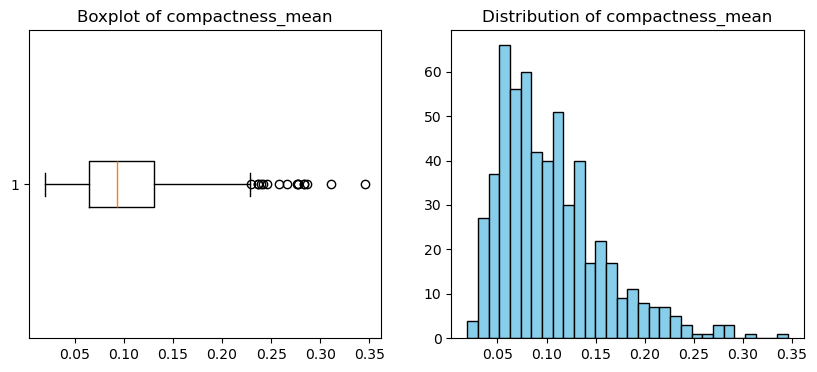

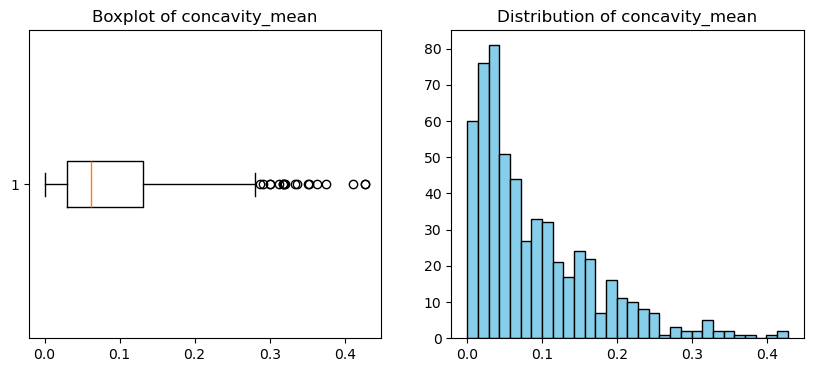

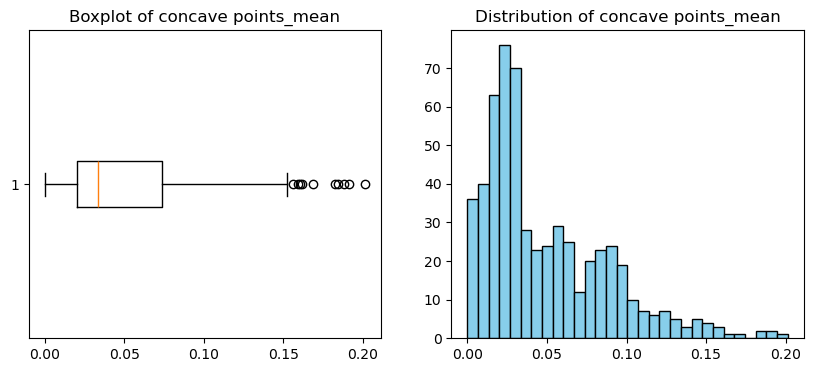

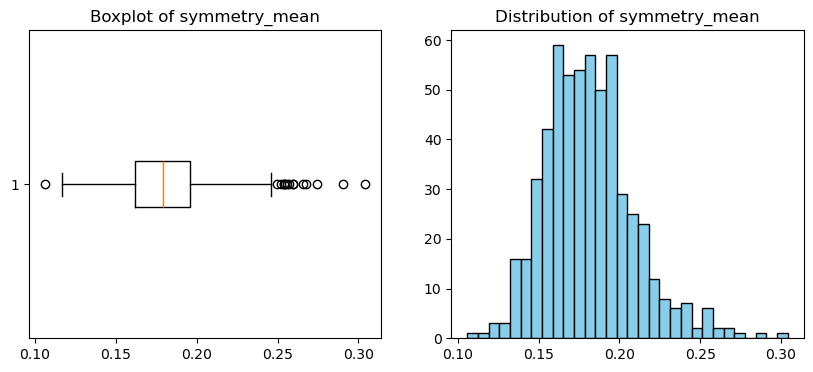

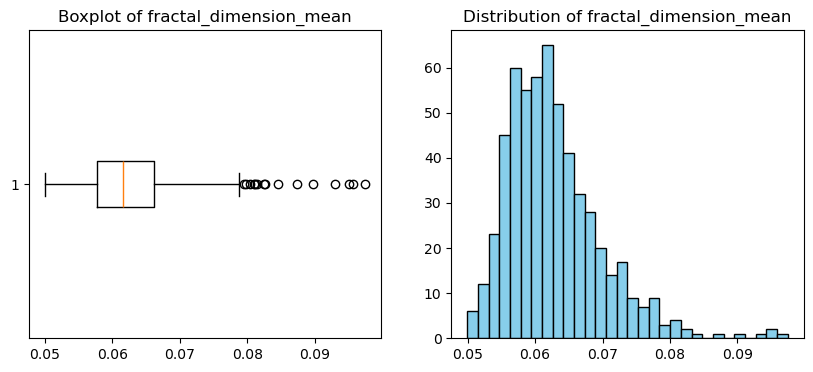

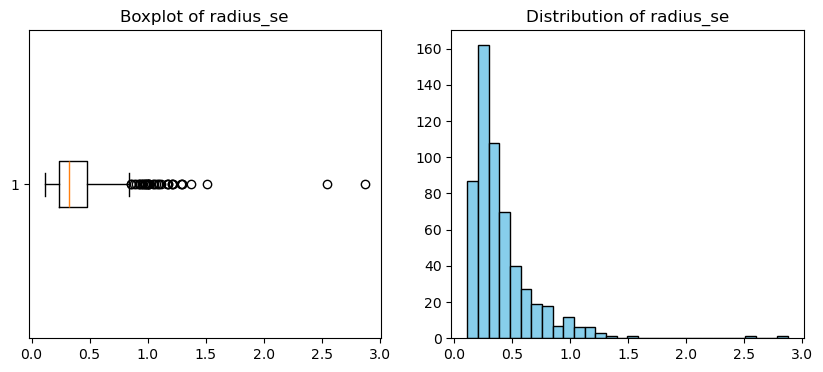

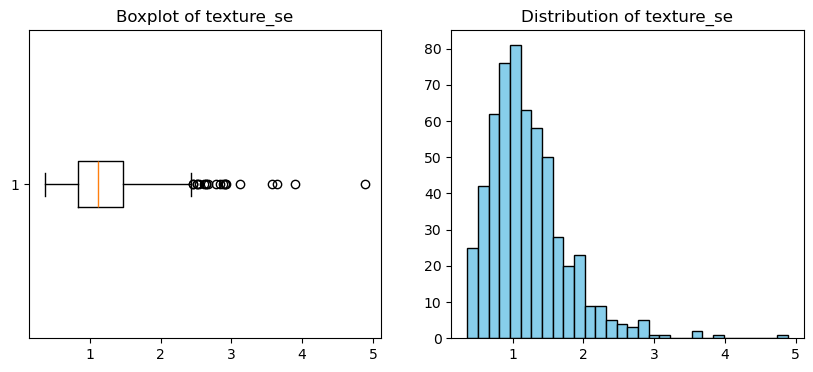

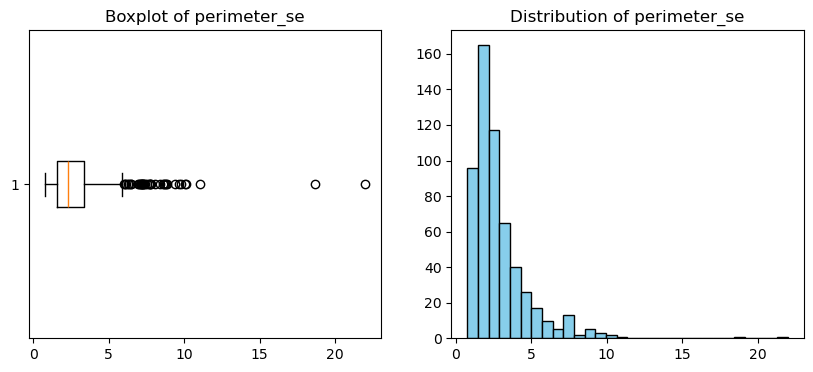

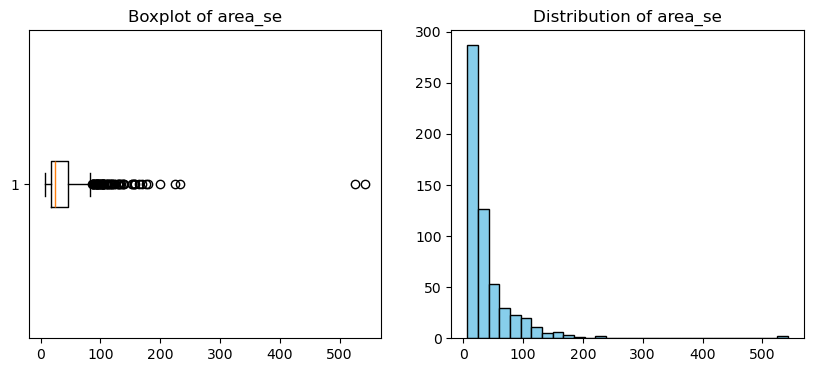

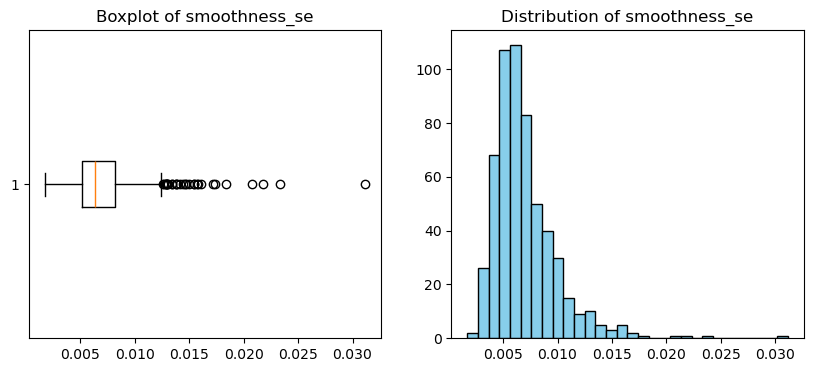

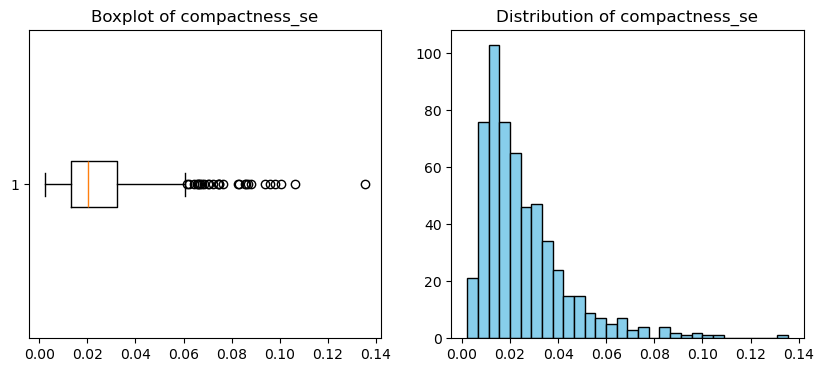

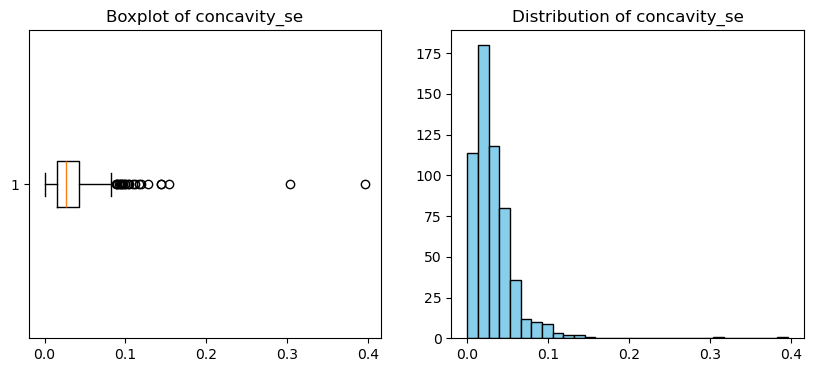

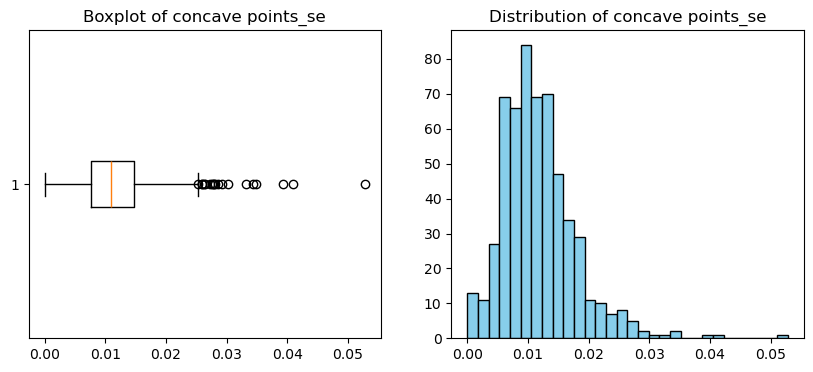

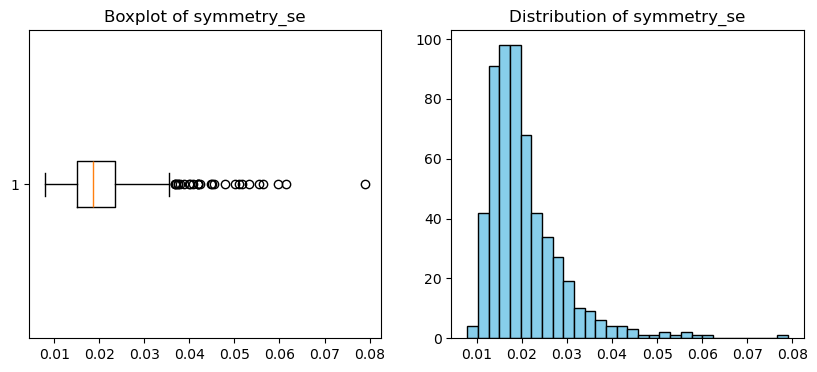

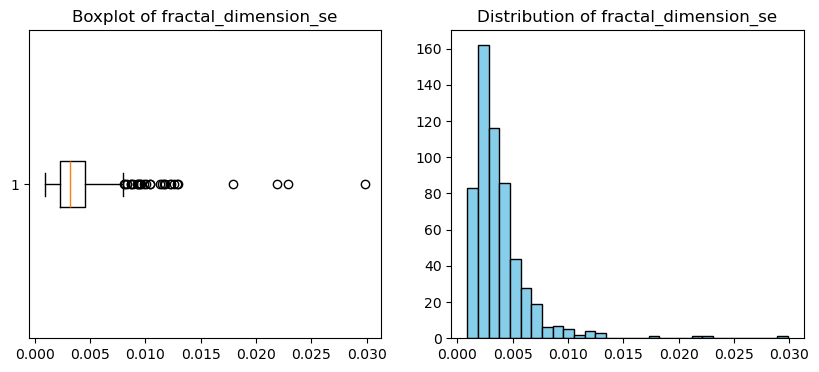

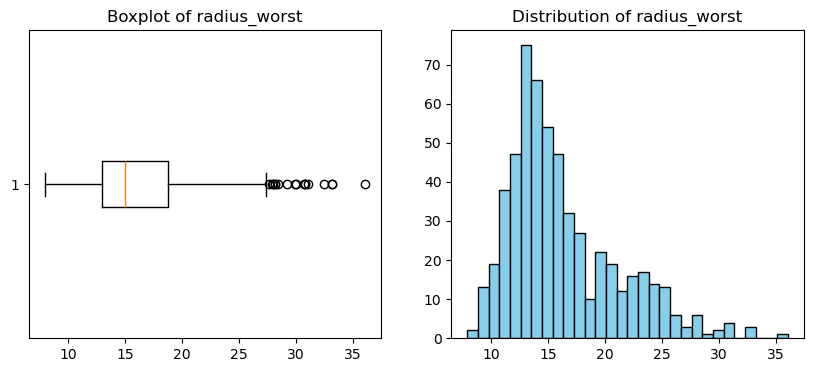

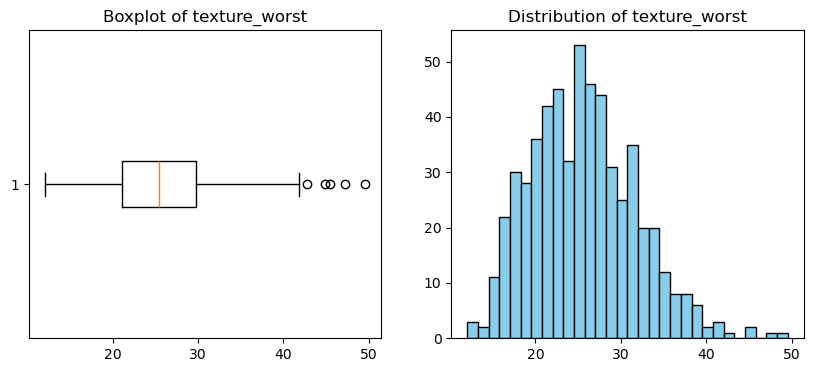

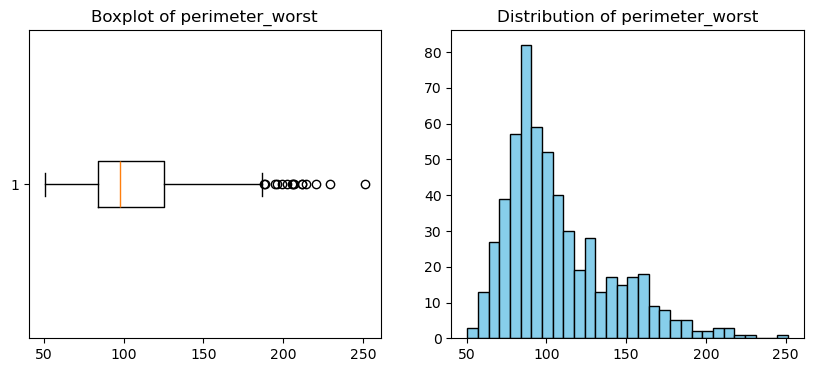

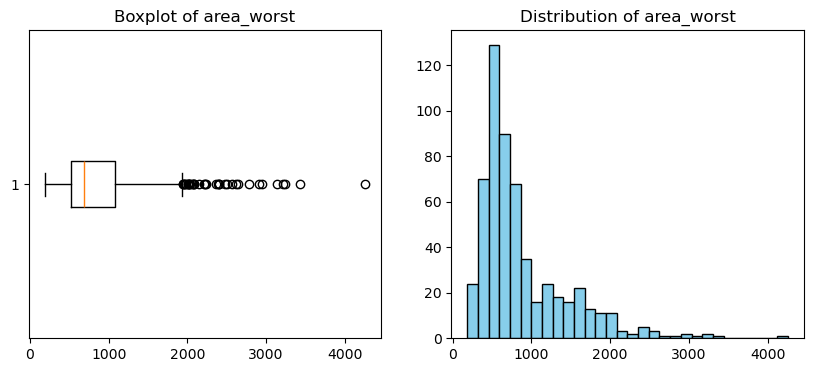

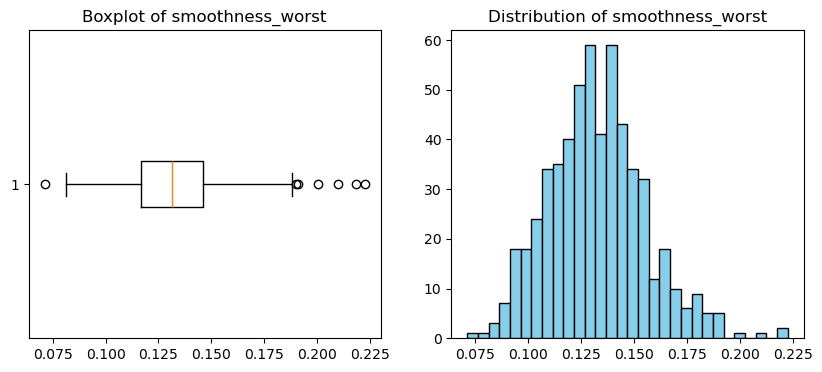

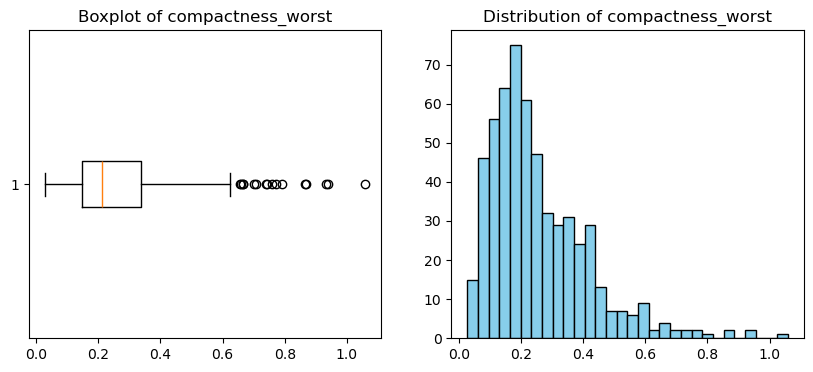

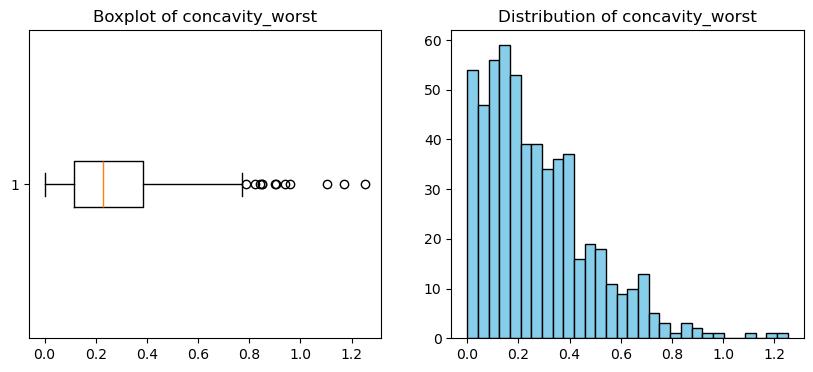

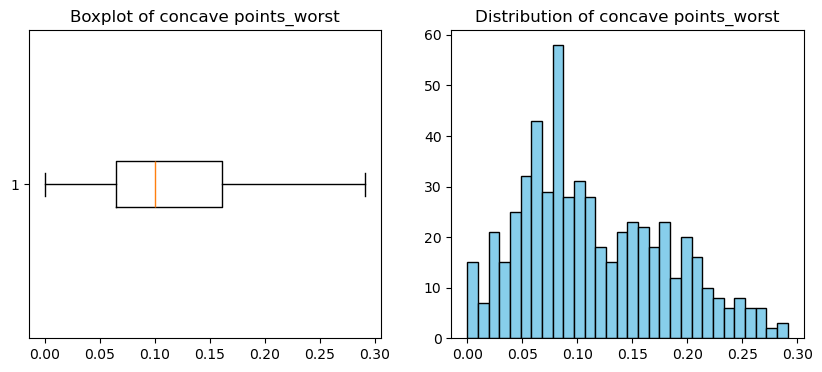

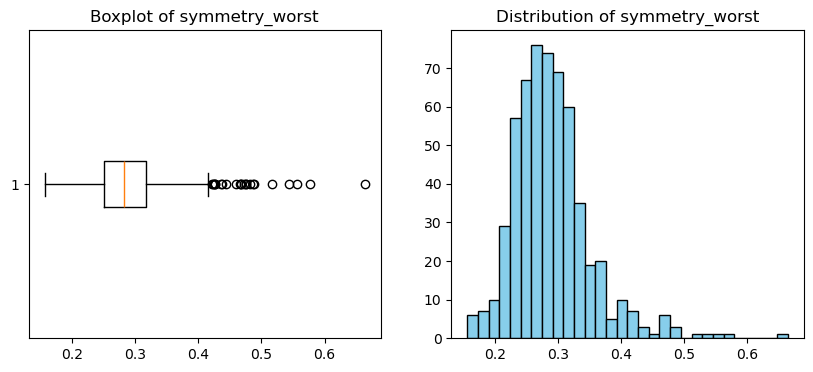

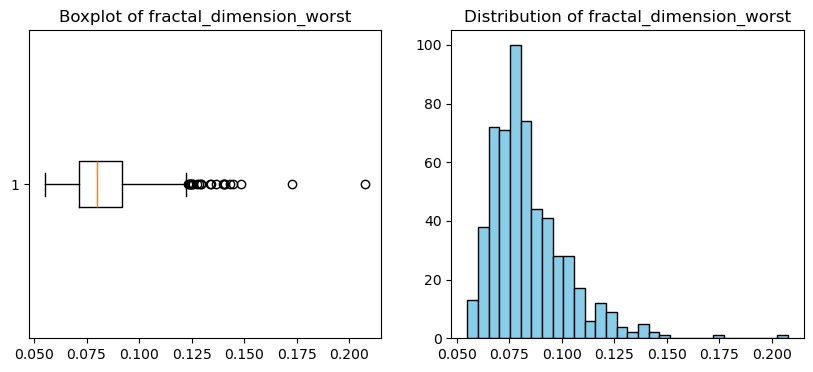


Summary of detected outliers per column:
- radius_mean: 14 outliers detected
- texture_mean: 7 outliers detected
- perimeter_mean: 0 outliers detected
- area_mean: 10 outliers detected
- smoothness_mean: 5 outliers detected
- compactness_mean: 11 outliers detected
- concavity_mean: 3 outliers detected
- concave points_mean: 0 outliers detected
- symmetry_mean: 9 outliers detected
- fractal_dimension_mean: 8 outliers detected
- radius_se: 16 outliers detected
- texture_se: 15 outliers detected
- perimeter_se: 3 outliers detected
- area_se: 19 outliers detected
- smoothness_se: 17 outliers detected
- compactness_se: 5 outliers detected
- concavity_se: 1 outliers detected
- concave points_se: 0 outliers detected
- symmetry_se: 6 outliers detected
- fractal_dimension_se: 4 outliers detected
- radius_worst: 0 outliers detected
- texture_worst: 0 outliers detected
- perimeter_worst: 0 outliers detected
- area_worst: 2 outliers detected
- smoothness_worst: 2 outliers detected
- compactness_w

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.964461,0.377377,1.973596,2.108920,0.112751,0.650915,1.066356,1.488638,0.277054,-0.756789,...,0.521788,2.468580,2.665355,0.767070,0.428375,1.121869,1.941020,0.625692,0.333092,1
1,0.134540,0.594978,0.225722,0.033027,2.126689,2.239566,0.677832,0.935739,2.210386,2.655183,...,0.607065,0.541116,0.511879,1.815139,1.456575,0.369659,1.187592,0.931552,2.854076,1
2,1.065623,1.211941,0.968866,1.020884,-0.930314,-0.560180,-0.560181,-0.104415,-1.002217,-0.846630,...,1.626840,1.138359,1.280326,-0.523241,-0.524523,-0.459405,0.068471,0.361226,0.400490,1
3,0.968887,-0.157666,1.022372,0.945414,0.317713,1.229127,0.797817,1.178389,0.507899,-0.077988,...,0.454277,1.712978,1.732891,0.539659,3.248023,1.244971,1.696556,2.302172,2.027655,1
4,0.997102,1.393701,1.028317,0.953051,-0.768502,0.399021,0.794553,0.693088,0.531946,-1.563363,...,0.521788,0.604460,0.449613,-0.770426,-0.177761,0.127537,0.311933,0.041568,-1.336598,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,-0.200005,2.666028,-0.232055,-0.252683,-0.999188,-0.802056,0.030768,-0.487341,-0.819464,-0.824669,...,1.957290,-0.443429,-0.403273,-0.295829,-0.460376,0.207111,-0.629251,-0.963401,-0.570354,0
394,-1.243947,2.330666,-1.232624,-1.119248,-0.246554,-0.277086,-0.009227,-0.332998,-0.689613,0.011853,...,1.809831,-1.315312,-1.126464,0.480335,-0.376707,-0.091461,-0.101451,-1.299157,0.264892,0
395,0.489238,1.068580,0.593727,0.388818,-0.708756,1.337899,0.866381,0.056962,-1.358104,0.051783,...,0.452500,0.328462,0.015273,-1.289517,0.981521,1.038895,0.283880,-1.225566,0.041037,0
396,0.271583,2.212905,0.295874,0.134104,0.499441,0.753963,-0.322863,0.278903,-0.958933,0.099698,...,1.500701,0.070562,-0.066128,-0.226617,0.138322,-0.549861,0.169663,-1.243964,0.295382,0


In [294]:
#ways to treat outliers: "remove", "keep", "median", "mean"
strategy="remove"
numerical_cols=data.drop(['diagnosis'],axis=1).columns.tolist()
target_col = 'diagnosis'
normalized_data = handle_outliers_and_normalize(data, numerical_cols, target_col, strategy)
normalized_data

##### Feature selection

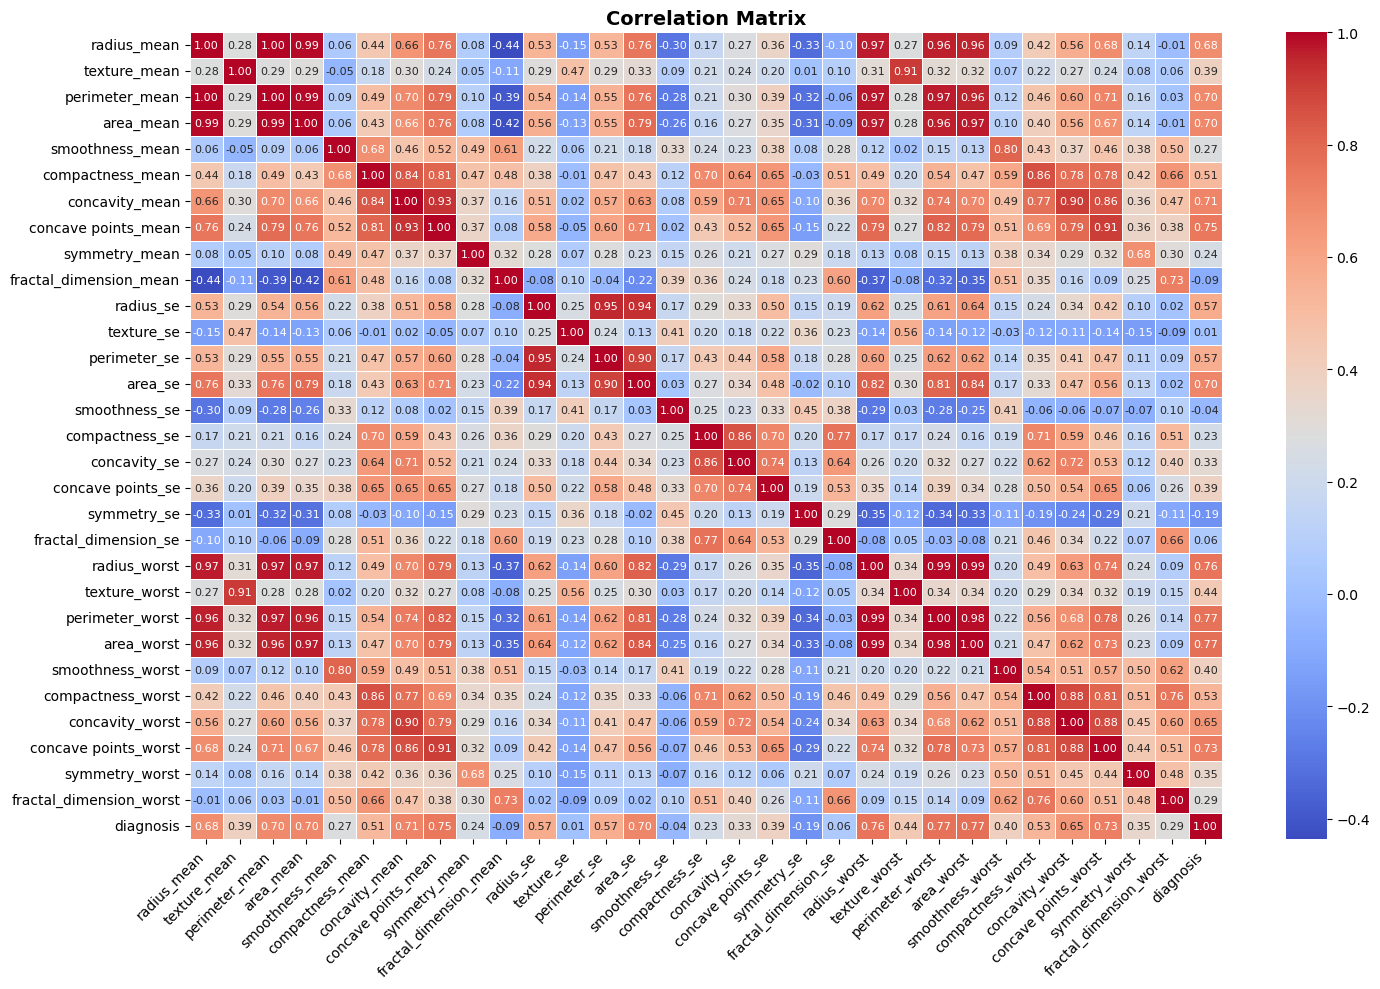

In [295]:
#calculate the correlation matrix
corr_matrix = normalized_data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8})
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.title("Correlation Matrix", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

Explained variance ratio by component:
[4.25290157e-01 1.87029171e-01 1.00377253e-01 6.38878533e-02
 6.31585595e-02 4.03607386e-02 2.71366446e-02 1.76653784e-02
 1.54743288e-02 1.13947256e-02 1.05053056e-02 9.36430756e-03
 7.81625475e-03 6.00182173e-03 3.56535285e-03 2.44509627e-03
 1.55372912e-03 1.37179296e-03 1.17232285e-03 9.55354290e-04
 7.71723292e-04 6.94847954e-04 5.33170875e-04 4.50766579e-04
 4.08338857e-04 2.96309304e-04 2.43820445e-04 5.24322779e-05
 1.92160199e-05 3.22619208e-06]


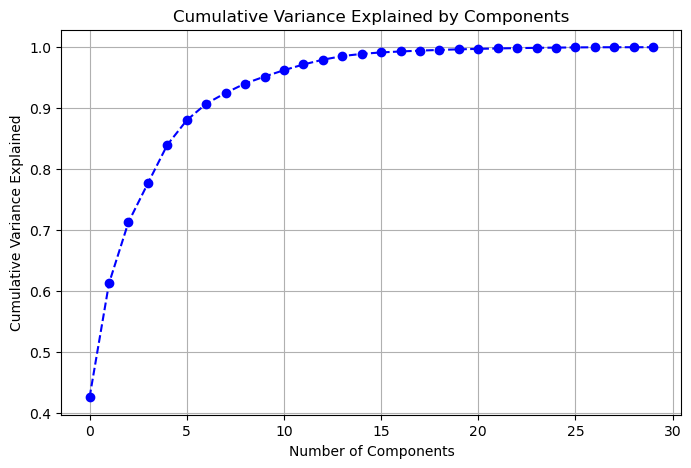

Optimal number of components to explain 95% of the variance: 10

First rows of the reduced dataset:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  5.927067 -3.505417 -1.262764  0.918328  0.253334 -0.212554  0.537035   
1  5.157012  4.175216  0.292621  1.952160  0.483912 -0.974573  2.663737   
2  1.173013 -3.408498  0.414729 -0.264824  1.803123  0.116081  1.676595   
3  6.369327  0.739285 -0.732368  0.143661 -0.210606  1.658567  1.718025   
4  2.786797 -0.666649  3.394382 -0.267920 -1.023933  1.203931 -2.657474   

        PC8       PC9      PC10  
0  0.289970  0.166103 -0.063746  
1 -0.756233 -0.267848  1.077529  
2  0.308689  0.787821 -0.138644  
3  1.021147 -0.201568 -0.475332  
4  1.050990  0.367212  0.048985  

Loadings of each component:


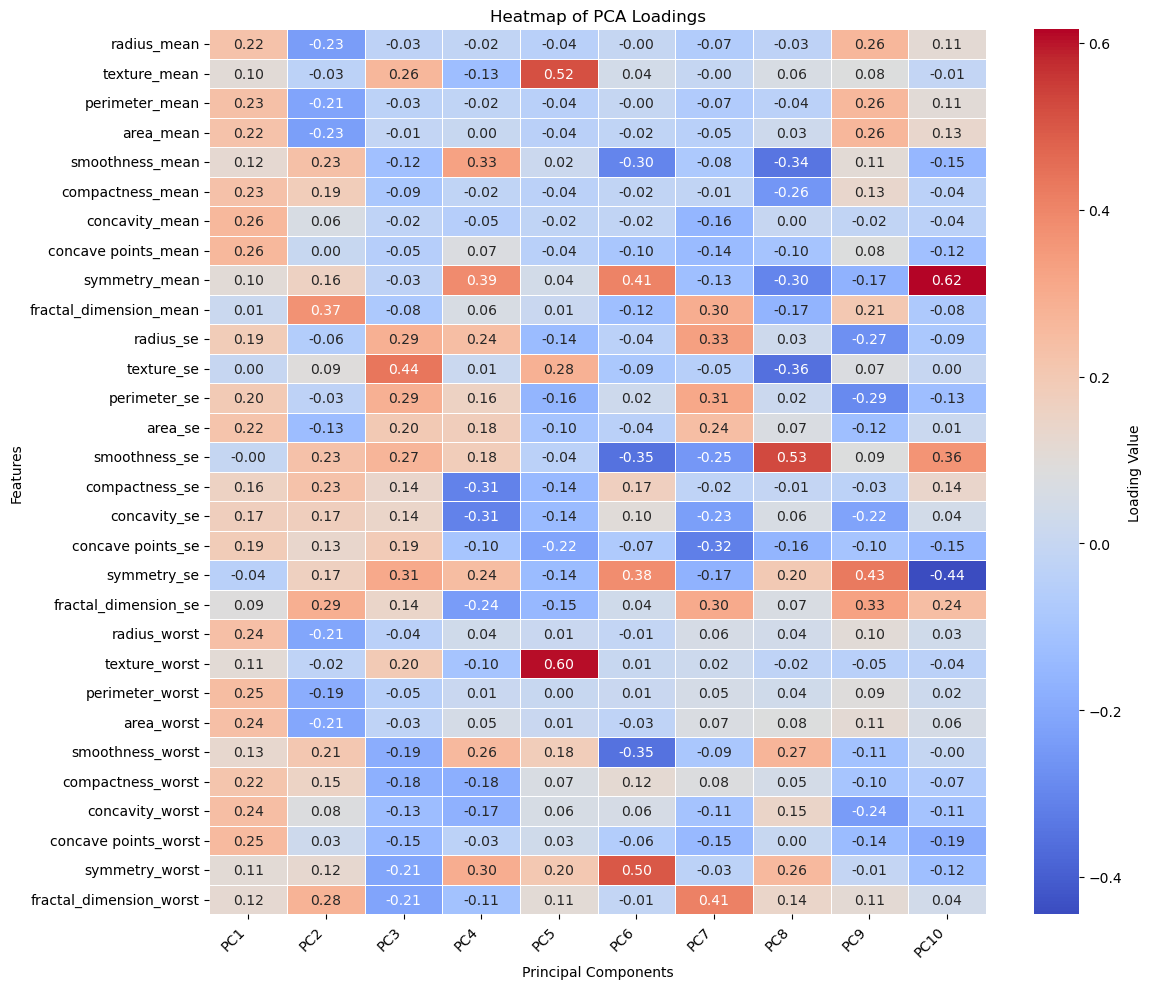

In [296]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Separate features (X) and target (y) from normalized data
target_col = 'diagnosis'  # Define the target column
X_scaled = normalized_data.drop(columns=[target_col])  # Only features
y = normalized_data[target_col]  # Target variable

# Initialize PCA to analyze all components
pca = PCA(n_components=None)

# Fit PCA to the normalized feature data
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_
print(f'Explained variance ratio by component:\n{explained_variance_ratio}')

# Visualize cumulative variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='--', color='b')
plt.title('Cumulative Variance Explained by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()

# Calculate cumulative variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Number of components to explain at least 95% of the variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Optimal number of components to explain 95% of the variance: {n_components}')

# Apply PCA with the optimal number of components
pca_opt = PCA(n_components=n_components)
X_reduced = pca_opt.fit_transform(X_scaled)

# Convert the reduced result to a DataFrame
X_reduced_df = pd.DataFrame(X_reduced, columns=[f'PC{i+1}' for i in range(n_components)])

print("\nFirst rows of the reduced dataset:")
print(X_reduced_df.head())
# Add the target column back to the reduced dataset if needed
X_reduced_df[target_col] = y.reset_index(drop=True)
# Show the loadings (weights) of each component
loadings = pd.DataFrame(
    pca_opt.components_.T,  # Transpose to get the loadings
    index=X_scaled.columns,
    columns=[f'PC{i+1}' for i in range(n_components)]
)
print("\nLoadings of each component:")
#print(loadings)

#plot heatmap of loadings to identify which variable has more influence in each component
plt.figure(figsize=(12, 10))
sns.heatmap(
    loadings, 
    cmap='coolwarm', 
    annot=True, 
    fmt='.2f', 
    linewidths=0.5, 
    cbar_kws={'label': 'Loading Value'}
)
plt.title('Heatmap of PCA Loadings')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [297]:
# Extract Loadings from PC1
loadings_pc1 = loadings['PC1']
# Sort Loadings by Absolute Importance
top_features_pc1 = loadings_pc1.abs().sort_values(ascending=False)
# Select the N Most Important Features
n_features = 10
selected_features_pc1 = top_features_pc1.head(n_features).index.tolist()
print(f"Top {n_features} features based on PC1: {selected_features_pc1}")

# Number of Components for 95% Variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
k_components = np.argmax(cumulative_variance >= 0.95) + 1
# Sum Absolute Loadings of the First K Components
top_loadings = loadings.iloc[:, :k_components].abs().sum(axis=1)
# Select the N Most Important Features
n_features = 10
selected_features_k = top_loadings.sort_values(ascending=False).head(n_features).index.tolist()
print(f"Top {n_features} features based on top {k_components} components: {selected_features_k}")


Top 10 features based on PC1: ['concave points_mean', 'concavity_mean', 'concave points_worst', 'perimeter_worst', 'concavity_worst', 'radius_worst', 'area_worst', 'perimeter_mean', 'compactness_mean', 'area_mean']
Top 10 features based on top 10 components: ['symmetry_se', 'symmetry_mean', 'smoothness_se', 'fractal_dimension_se', 'symmetry_worst', 'smoothness_mean', 'smoothness_worst', 'radius_se', 'concave points_se', 'perimeter_se']


In [299]:
from sklearn.model_selection import train_test_split

# y is defined in PCA
# if we want to use the top 10 features normalized_data[selected_features_k]
# divide data for train and test set (80/20)
X_train, X_test, y_train, y_test = train_test_split(normalized_data[selected_features_k], y, test_size=0.5, random_state=42)

print(f'Training size: {X_train.shape}')
print(f'Test size: {X_test.shape}')

Training size: (199, 10)
Test size: (199, 10)


##### KNN

Test accuracy with default KNN (k=5): 0.9625
Best k: 3


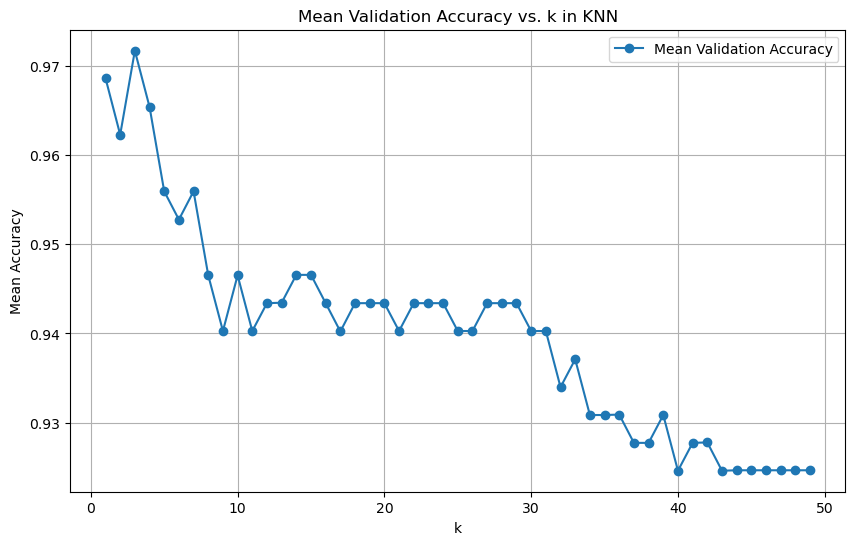

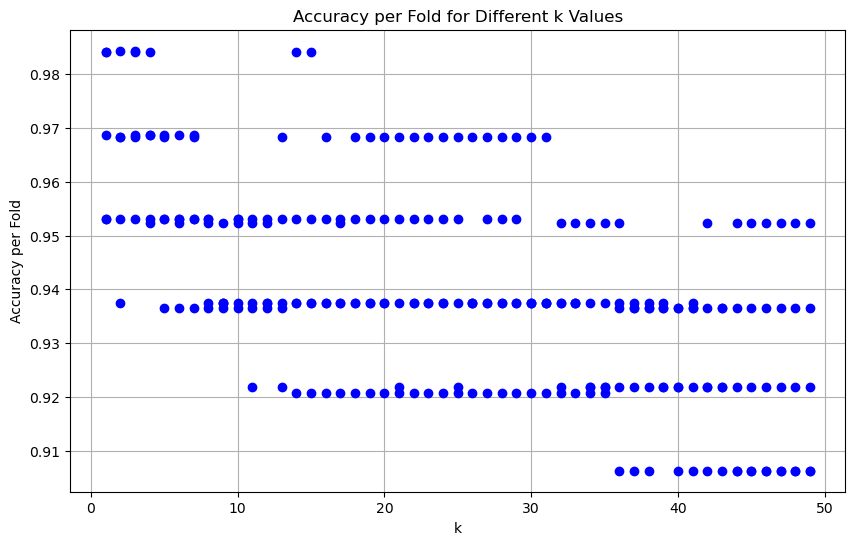

Test accuracy with k=3: 0.9750
Test accuracy with Weighted KNN and k=3: 0.9750


In [300]:
# Importar bibliotecas necesarias
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import numpy as np
import matplotlib.pyplot as plt

# Dividir datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_reduced_df, y, test_size=0.2, random_state=42)

# Inicializar modelo KNN con valores por defecto (k=5)
knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
test_accuracy_default = knn_default.score(X_test, y_test)
print(f"Test accuracy with default KNN (k=5): {test_accuracy_default:.4f}")

# Inicializar variables para almacenar resultados
k_values = range(1, 50)
cv_accuracies = []

# Almacenar precisiones de cada fold para análisis
all_folds_accuracies = {k: [] for k in k_values}
skf = KFold(n_splits=5, shuffle=True, random_state=42)

# Validación cruzada para distintos valores de k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    fold_accuracies = cross_val_score(knn, X_train, y_train, cv=skf, scoring='accuracy')
    all_folds_accuracies[k] = fold_accuracies
    cv_accuracies.append(fold_accuracies.mean())

# Encontrar el mejor valor de k (con la mejor precisión promedio)
best_k = k_values[np.argmax(cv_accuracies)]
print(f"Best k: {best_k}")

# Graficar la precisión media en validación cruzada para distintos valores de k
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_accuracies, marker='o', label='Mean Validation Accuracy')
plt.xlabel('k')
plt.ylabel('Mean Accuracy')
plt.title('Mean Validation Accuracy vs. k in KNN')
plt.legend()
plt.grid(True)
plt.show()

# Graficar precisión por fold para distintos valores de k
plt.figure(figsize=(10, 6))
for k in k_values:
    plt.plot([k] * len(all_folds_accuracies[k]), all_folds_accuracies[k], 'bo', label=f'k={k}' if k == 1 else "")
plt.xlabel('k')
plt.ylabel('Accuracy per Fold')
plt.title('Accuracy per Fold for Different k Values')
plt.grid(True)
plt.show()

# Entrenar modelo con el mejor k y evaluar en el conjunto de prueba
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
test_accuracy = best_knn.score(X_test, y_test)
print(f"Test accuracy with k={best_k}: {test_accuracy:.4f}")

# Mejorar con KNN Ponderado (Weighted KNN)
weighted_knn = KNeighborsClassifier(n_neighbors=best_k, weights='distance')
weighted_knn.fit(X_train, y_train)
weighted_test_accuracy = weighted_knn.score(X_test, y_test)
print(f"Test accuracy with Weighted KNN and k={best_k}: {weighted_test_accuracy:.4f}")


##### Decision Tree

✅ Best max_depth: 1
📊 Best cross-validated accuracy: 1.0000


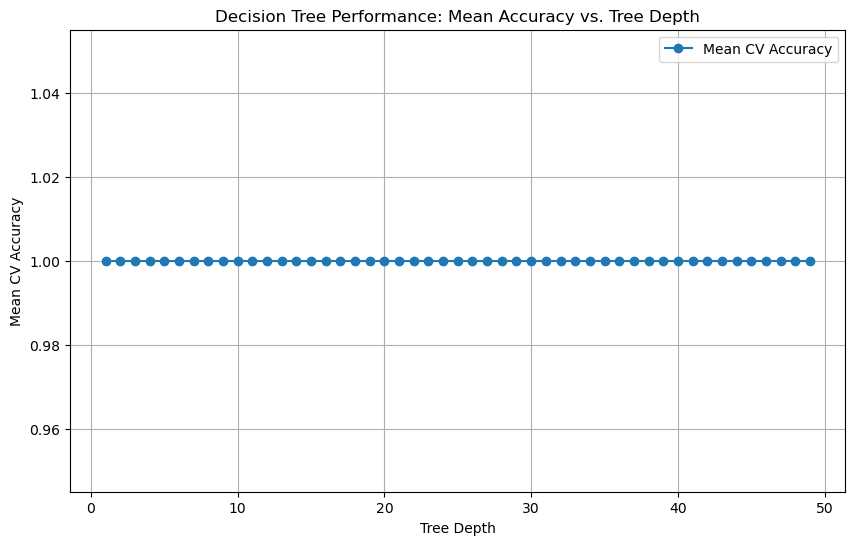

🎯 Test accuracy with max_depth=1: 1.0000


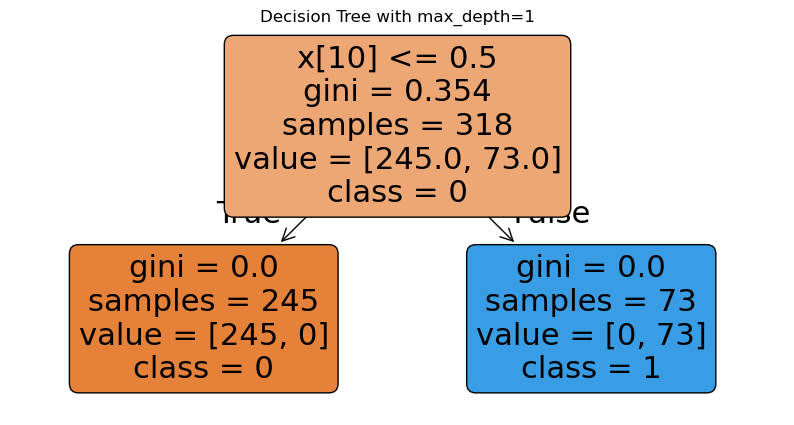

|--- feature_10 <= 0.50
|   |--- class: 0
|--- feature_10 >  0.50
|   |--- class: 1



In [301]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=42)

# Set up KFold Cross-Validation
skf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the parameter grid for max_depth
param_grid = {'max_depth': np.arange(1, 50)}  # Test depths from 1 to 50

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(tree_clf, param_grid, cv=skf, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)  # Changed from train_X, train_Y to X_train, y_train

# Retrieve the best parameters and corresponding score
best_depth = grid_search.best_params_['max_depth']
best_score = grid_search.best_score_

print(f"✅ Best max_depth: {best_depth}")
print(f"📊 Best cross-validated accuracy: {best_score:.4f}")

# Extract mean cross-validation scores for each max_depth
mean_test_scores = grid_search.cv_results_['mean_test_score']

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(param_grid['max_depth'], mean_test_scores, marker='o', label='Mean CV Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Mean CV Accuracy')
plt.title('Decision Tree Performance: Mean Accuracy vs. Tree Depth')
plt.grid(True)
plt.legend()
plt.show()

# Retrain Decision Tree with best depth
best_tree_clf = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
best_tree_clf.fit(X_train, y_train)  # Changed from train_X, train_Y to X_train, y_train

# Evaluate on the test set
test_accuracy = accuracy_score(y_test, best_tree_clf.predict(X_test))  # Changed from test_Y, test_X to y_test, X_test
print(f"🎯 Test accuracy with max_depth={best_depth}: {test_accuracy:.4f}")

# Visualize decision tree
plt.figure(figsize=(10, 5))
plot_tree(best_tree_clf, class_names=[str(c) for c in best_tree_clf.classes_], filled=True, rounded=True)
plt.title(f"Decision Tree with max_depth={best_depth}")
plt.show()

# Print the tree rules (optional)
tree_rules = export_text(best_tree_clf)
print(tree_rules)

##### Random Forest

Best Parameters: max_depth=5, n_estimators=50
Best Cross-Validated Accuracy: 1.0000


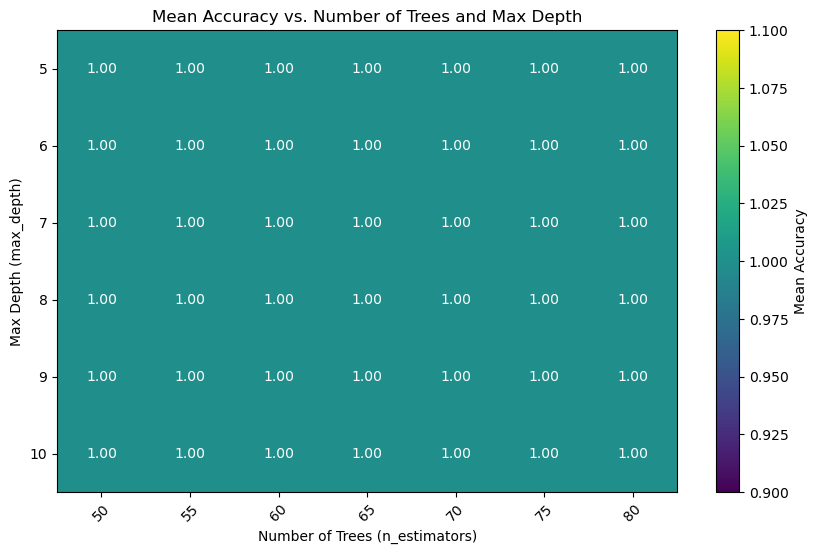

Test accuracy with best parameters: 1.0000


In [302]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
# Define the range of values for max_depth and n_estimators
max_depth_values = [5,6,7,8,9,10]
n_estimators_values = [50,55,60,65,70,75,80]

# List to store results and an array to store mean accuracies for visualization
results = []
mean_accuracies = np.zeros((len(max_depth_values), len(n_estimators_values)))
skf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search using cross-validation
for i, max_depth in enumerate(max_depth_values):
    for j, n_estimators in enumerate(n_estimators_values):
        # Initialize a RandomForest classifier with given max_depth and n_estimators
        rf_clf = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators, random_state=42)
        
        # Perform 5-fold cross-validation and compute mean accuracy
        cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=skf, scoring='accuracy')
        mean_accuracy = np.mean(cv_scores)
        
        # Store the mean accuracy in the array for visualization
        mean_accuracies[i, j] = mean_accuracy
        
        # Append the result to the list
        results.append({
            'max_depth': max_depth,
            'n_estimators': n_estimators,
            'mean_accuracy': mean_accuracy
        })

# Find the best combination of hyperparameters based on highest accuracy
best_result = max(results, key=lambda x: x['mean_accuracy'])
print(f"Best Parameters: max_depth={best_result['max_depth']}, n_estimators={best_result['n_estimators']}")
print(f"Best Cross-Validated Accuracy: {best_result['mean_accuracy']:.4f}")

plt.figure(figsize=(10, 6))
cax = plt.imshow(mean_accuracies, interpolation='nearest', cmap='viridis', aspect='auto')
plt.colorbar(cax, label='Mean Accuracy')
plt.xticks(np.arange(len(n_estimators_values)), n_estimators_values, rotation=45)
plt.yticks(np.arange(len(max_depth_values)), max_depth_values)
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Max Depth (max_depth)')
plt.title('Mean Accuracy vs. Number of Trees and Max Depth')

for i in range(len(max_depth_values)):
    for j in range(len(n_estimators_values)):
        plt.text(j, i, f'{mean_accuracies[i, j]:.2f}', ha='center', va='center', color='white', fontsize=10)

plt.grid(False)
plt.show()

# Train the best RandomForest model with optimal parameters
best_rf_clf = RandomForestClassifier(max_depth=best_result['max_depth'], n_estimators=best_result['n_estimators'], random_state=42)
best_rf_clf.fit(X_train, y_train)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, best_rf_clf.predict(X_test))
print(f"Test accuracy with best parameters: {test_accuracy:.4f}")

##### Logistic Regression

Precision: 1.0
Recall: 0.92
Accuracy: 0.975
F1: 0.9583333333333334


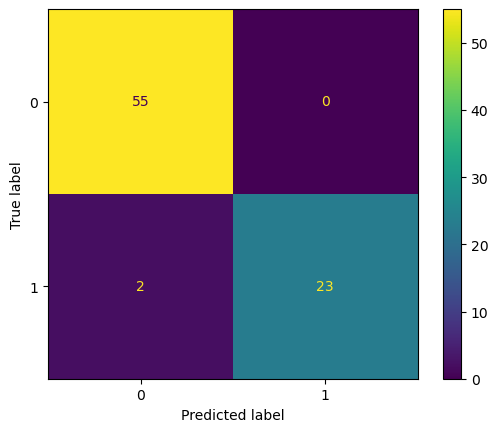

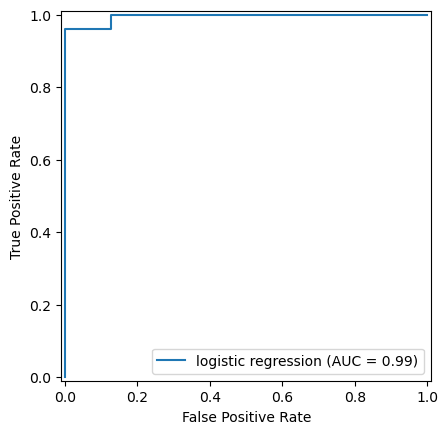

In [303]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Create a logistic regression model
model_diab = LogisticRegression()

# Fit the model with training data (X_train and y_train)
model_diab.fit(X_train, y_train)

# Predict values for the test data
predict = model_diab.predict(X_test)

# Create a confusion matrix to evaluate the model’s performance
matrix = metrics.confusion_matrix(y_test, predict)

# Visualize the confusion matrix
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot()

# Calculate and display the precision of the model
# Precision = TP / (TP + FP) -> How many predicted positives are actually positive
print('Precision:', metrics.precision_score(y_test, predict))

# Calculate and display the recall (sensitivity) of the model
# Recall = TP / (TP + FN) -> Ability of the model to capture all actual positives
print('Recall:', metrics.recall_score(y_test, predict))

# Calculate and display the accuracy of the model
# Accuracy = (TP + TN) / (Total) -> Proportion of correct predictions
print('Accuracy:', metrics.accuracy_score(y_test, predict))

# Calculate and display the F1-score
# F1 = 2 * (Precision * Recall) / (Precision + Recall) -> Harmonic mean of precision and recall
print('F1:', metrics.f1_score(y_test, predict))

# Get the prediction probabilities for the positive class
# predict_proba returns a matrix with 2 columns: [P(class 0), P(class 1)]
predict_prob = model_diab.predict_proba(X_test)

# Compute the ROC (Receiver Operating Characteristic) curve
# fpr: False Positive Rate
# tpr: True Positive Rate
# thresholds: Decision thresholds to classify positive/negative
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_prob[:, 1]) 

# Calculate the Area Under the ROC Curve (AUC)
# AUC measures the model's ability to distinguish between classes
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
# Useful to assess model performance across different classification thresholds
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, 
                                   estimator_name='logistic regression')
display.plot()
